In [19]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt



In [20]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [21]:
print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

(28, 28)
784


In [75]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
#train_data /=255.0
#test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [76]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 6s 24ms/step - loss: 0.2889 - accuracy: 0.9112 - val_loss: 0.1438 - val_accuracy: 0.9504
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1001 - accuracy: 0.9695 - val_loss: 0.1164 - val_accuracy: 0.9624
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.0905 - val_accuracy: 0.9722
Epoch 4/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0436 - accuracy: 0.9857 - val_loss: 0.0755 - val_accuracy: 0.9763
Epoch 5/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0662 - val_accuracy: 0.9798
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.0645 - val_accuracy: 0.9811
Epoch 7/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0760 - val_accuracy: 0.9794

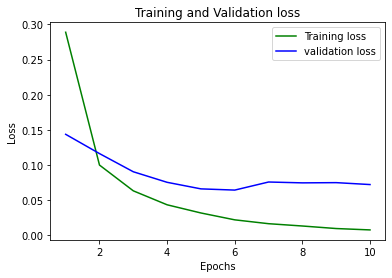

In [77]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train,'g', label='Training loss')
plt.plot(epochs, loss_val,'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

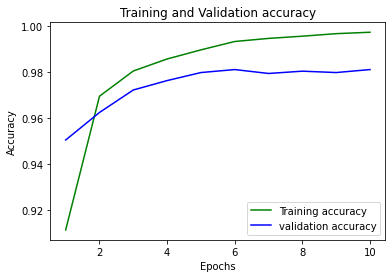

In [78]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train,'g', label='Training accuracy')
plt.plot(epochs, acc_val,'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

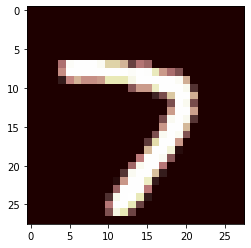

In [79]:
import random
i = random.randint(0,28)
plt.imshow(test_images[i], cmap = 'pink')
plt.show()

In [80]:
train_image = test_images[i]
mapping = {0:"0", 1:"1", 2:"2", 3:"3", 4:"4", 5:"5", 6:"6", 7:"7", 8:"8", 9:"9"}
output = model.predict(train_image.reshape(1,784))
print("\n\nFinal Output: {}".format(np.argmax(output)))

1/1 [==============================] - 0s 61ms/step


Final Output: 7


In [81]:
model_1 = Sequential()
model_1.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(256, activation='tanh'))
model_1.add(Dense(128, activation='tanh'))
model_1.add(Dense(10, activation='softmax'))
model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 8s 32ms/step - loss: 0.2859 - accuracy: 0.9094 - val_loss: 0.1407 - val_accuracy: 0.9573
Epoch 2/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0946 - accuracy: 0.9700 - val_loss: 0.1303 - val_accuracy: 0.9601
Epoch 3/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0603 - accuracy: 0.9811 - val_loss: 0.0824 - val_accuracy: 0.9737
Epoch 4/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0410 - accuracy: 0.9868 - val_loss: 0.1308 - val_accuracy: 0.9611
Epoch 5/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0618 - val_accuracy: 0.9829
Epoch 6/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0752 - val_accuracy: 0.9789
Epoch 7/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0857 - val_accuracy: 0.9763

In [82]:
model_1 = Sequential()
model_1.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(256, activation='sigmoid'))
model_1.add(Dense(128, activation='sigmoid'))
model_1.add(Dense(10, activation='softmax'))
model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 8s 31ms/step - loss: 0.5987 - accuracy: 0.8290 - val_loss: 0.2978 - val_accuracy: 0.9046
Epoch 2/10
235/235 [==============================] - 8s 33ms/step - loss: 0.1599 - accuracy: 0.9536 - val_loss: 0.1357 - val_accuracy: 0.9602
Epoch 3/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0984 - accuracy: 0.9701 - val_loss: 0.0873 - val_accuracy: 0.9745
Epoch 4/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0672 - accuracy: 0.9796 - val_loss: 0.0825 - val_accuracy: 0.9744
Epoch 5/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0710 - val_accuracy: 0.9787
Epoch 6/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0369 - accuracy: 0.9889 - val_loss: 0.0642 - val_accuracy: 0.9810
Epoch 7/10
235/235 [==============================] - 7s 32ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0613 - val_accuracy: 0.9814